In [1]:
# import the libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#define function for displaying the image
def show_img(img):
    plt.axis('off')
    plt.imshow(img)

# Part 1

In [3]:
def to_sketch(image):
    
    #converting from BGR to RGB
    img_gray = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
    
    #make the image revert
    img_invert = cv2.bitwise_not(img_gray)
    
    #blurring the image using Gaussian filter
    img_blur = cv2.GaussianBlur(img_invert,(21,21),sigmaX=0,sigmaY=0)
    
    #devide image by inverted one
    sketched = cv2.divide(img_gray,255-img_blur,scale=256)
    
    #create kernel for sharpening
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    
    #sharpening the image using kernel above
    sharped = cv2.filter2D(sketched, -1, kernel)
    
    #mix gray image with sharped
    sketched = cv2.addWeighted(img_gray, .2, sharped, .8,1)
    
    return sharped

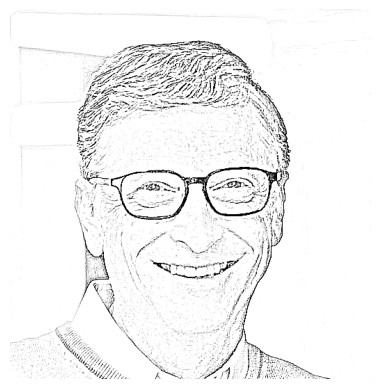

In [4]:
#reading the image and applying sketch and displaying the result
image_address = 'bill.png'
img = cv2.imread(image_address)
plt.axis('off')
plt.imshow(to_sketch(img),cmap='gray')
plt.show()

In [5]:
def to_sketch2(img):
    img_gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

    #blurring the image using Gaussian filter
    img_blur = cv2.GaussianBlur(img_gray,(21,21),sigmaX=0,sigmaY=0)

    #devide image by inverted one
    sketched = cv2.divide(img_gray,255-img_blur,scale=256)
    
    return sketched 

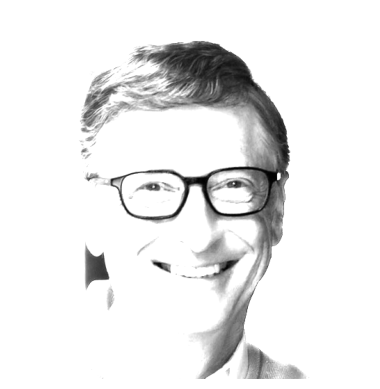

In [6]:
sketched = to_sketch2(img)
plt.axis('off')
plt.imshow(sketched,cmap='gray')
plt.show()

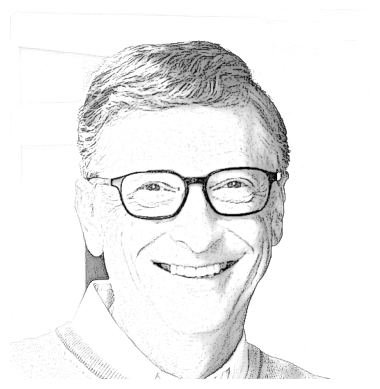

In [7]:
s1 = to_sketch(img)
s2 = to_sketch2(img)
res = cv2.addWeighted(s1, 0.5, s2, 0.5, 1)
plt.axis('off')
plt.imshow(res,cmap='gray')
plt.show()

## streaming webcam

In [21]:
# define a video capture object
vid = cv2.VideoCapture(0)

while(True):
    
    #read each frame 
    ret, frame = vid.read()
    
    #apply filter bank to each frame
    s1 = to_sketch(frame)
    s2 = to_sketch2(frame)
    sketched = cv2.addWeighted(s1, 0.5, s2, 0.5, 1)
    
    #displaying each filtered frame
    cv2.imshow("result" , sketched)
    
    #end of streaming by pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

#release the source
vid.release()

#close all windows
cv2.destroyAllWindows()

# Part 2

In [8]:
#define function for making the image cartoonize
def cartoonize(img):
    
    #using bilateral filter to blur the image
    colorImage = cv2.bilateralFilter(img, 15, 50, 50)
    
    #computing gradient of image in x direction
    grad_x = cv2.Sobel(colorImage, cv2.CV_16S, 1, 0, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
    
    #computing gradient of image in y direction
    grad_y = cv2.Sobel(colorImage, cv2.CV_16S, 0, 1, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)

    #normalizing the gradients
    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)

    #mix graient in both direction
    grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

    #mix gradient of image with orinial one to shapren the image
    grad = cv2.addWeighted(colorImage, 1, grad, -0.5, 0)
    
    return grad

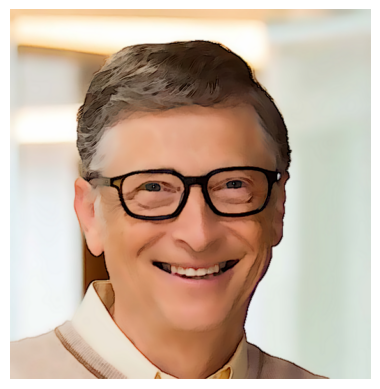

In [9]:
img = cv2.imread(image_address)
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
cartoonized = cartoonize(img)
show_img(cartoonized)

In [10]:
#another method for cartoonizing the image
def cartoonize2(img):
    
    #convert image to gray scale
    img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #blurring the image using median filter
    smoothGrayScale = cv2.medianBlur(img_grey, 5)
    
    #get the edges
    getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
    
    #bitwise the image with edge computed above
    cartoonImage = cv2.bitwise_and(img, img, mask=getEdge)
    
    return cartoonImage

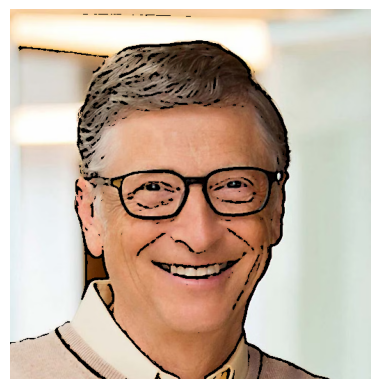

In [11]:
show_img(cartoonize2(img))